   # Исследование Интернет-мазазина компьютерных игр "Стримчик".

    В нашем распоряжении данные о продажах со всего мира интернет-магазина "Стримчик" до 2016 года. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Все данные хранятся в файле  /datasets/games.csv. Необходимо исследовать данные и выявить закономерности для того, чтобы в 2017 году сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 
    
    Ход работы:
    
    1) Подготовка данных (обрабатываем дубликаты, пропуски, меняем типы данных, где необходимо)
    2) Добавляем столбец суммарные продажи во всех регионах.
    3) Выбираем нужный актуальный период и провидим исследовательский анализ данных на нем.
    4) Составляем портрет пользователя каждого региона.
    5) Провяем гипотезы.
    6) Пишем итоговые выводы.
   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats as st
import pylab

#### Шаг 1. Загрузка данных

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.shape

(16715, 11)

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


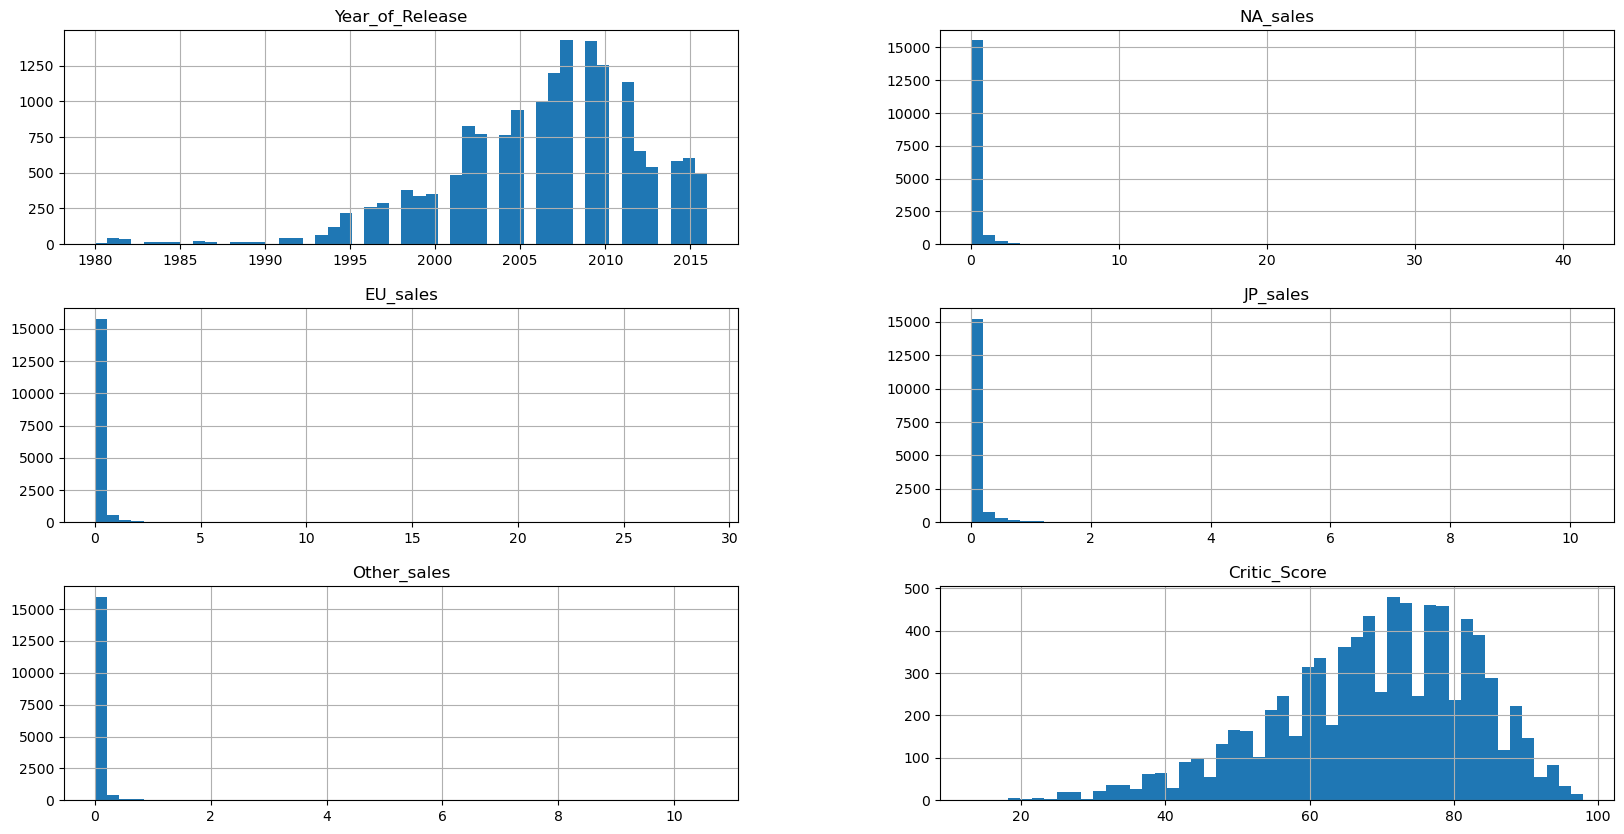

In [7]:
data.hist(bins=50, figsize=(20, 10));

Записали данные файла в data. Выводим информацию. В данных есть пропущенные значения.

#### Шаг 2. Предобработка данных

In [8]:
data[data.duplicated()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


Полных дубликатов нет.

In [9]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [10]:
data['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [11]:
data = data.dropna(subset=['Year_of_Release'])

In [12]:
data['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [13]:
data['Year_of_Release'] = data['Year_of_Release'].astype('int')

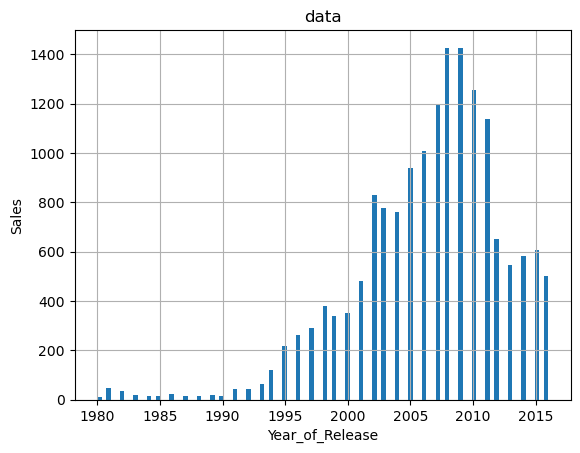

In [14]:
ax = data['Year_of_Release'].hist(bins=100)
ax.set(title='data', xlabel='Year_of_Release', ylabel='Sales');

В столбце год выпуска есть пропущенные значения. Скорее всего они не заполнились из-за технической ошибки. Так как в дальнейшем мы будем делить данные по годам, пропуски лучше удалить, их не так много.

In [15]:
data['Name'] = data['Name'].str.lower()

In [16]:
data['Platform'] = data['Platform'].str.lower()

In [17]:
data['Genre'] = data['Genre'].str.lower()

Приводим строковые переменные к нижнему регистру, чтобы было удобнее работать.

In [18]:
data = data.dropna(subset=['Name', 'Genre'])

Удаляем пропуски в имени и жанре, тк их мало.

In [19]:
data.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8461
User_Score         6605
Rating             6676
dtype: int64

Остались пропущенные значения в трех столбцах, оставим их без изменений, тк их довольно таки большое количество и заполнение их какими-либо данные может повлиять на результат. Скорее всего пропуски получились из-за того, что данные оценки и возрастной рейтинг не были выставлены по какой-то причине.

In [20]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [21]:
data.shape

(16444, 11)

In [22]:
data[data['User_Score'] == 'tbd'].count()

Name               2376
Platform           2376
Year_of_Release    2376
Genre              2376
NA_sales           2376
EU_sales           2376
JP_sales           2376
Other_sales        2376
Critic_Score       1056
User_Score         2376
Rating             2326
dtype: int64

In [23]:
data.loc[data['User_Score'] == 'tbd', ['User_Score']] = 'nan'

In [24]:
data['User_Score'] = data['User_Score'].astype('float')

В столбце с оценками пользователей видим элемент tbd, что значит оценка уточняется. Таких элементов слишком много, чтобы их удалить. Поэтому заменим их на nan. После этого сменим тип данных на float.

In [25]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16444 non-null  object 
 1   Platform         16444 non-null  object 
 2   Year_of_Release  16444 non-null  int32  
 3   Genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   Other_sales      16444 non-null  float64
 8   Critic_Score     7983 non-null   float64
 9   User_Score       7463 non-null   float64
 10  Rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Таким образом, мы избавились от части пропусков, поменяли типы данных.

In [27]:
data.shape

(16444, 11)

In [28]:
data['Sum_sales'] = data[['EU_sales', 'NA_sales', 'JP_sales', 'Other_sales']].sum(axis=1)

Добавили столбец с суммарными продажами по всем регионам.

#### Шаг 3. Исследовательский анализ данных

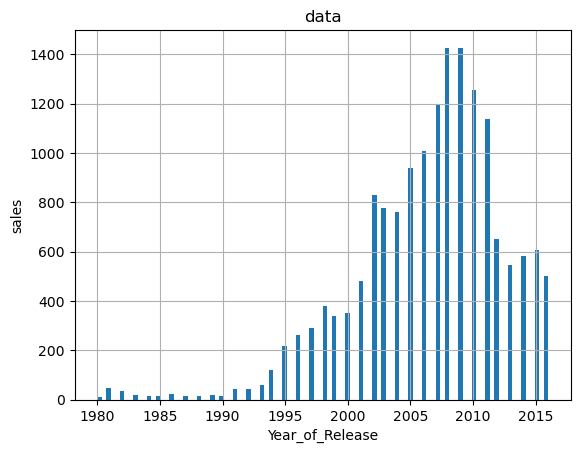

In [29]:
ax = data['Year_of_Release'].hist(bins=100)
ax.set(title='data', xlabel='Year_of_Release', ylabel='sales');

Большинство данных были получены с 2001 до 2016 года. Пик - 2009-2010 года.

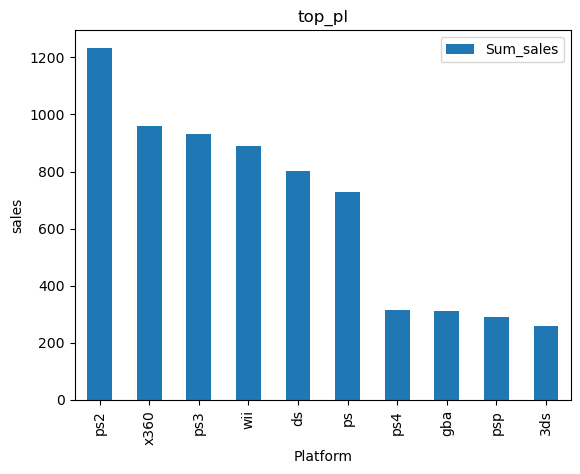

In [30]:
top_pl = data.groupby('Platform')['Sum_sales'].sum().sort_values(ascending=False).head(10).reset_index()
ax = top_pl.plot.bar(x='Platform', y='Sum_sales')
ax.set(title='top_pl', xlabel='Platform', ylabel='sales');

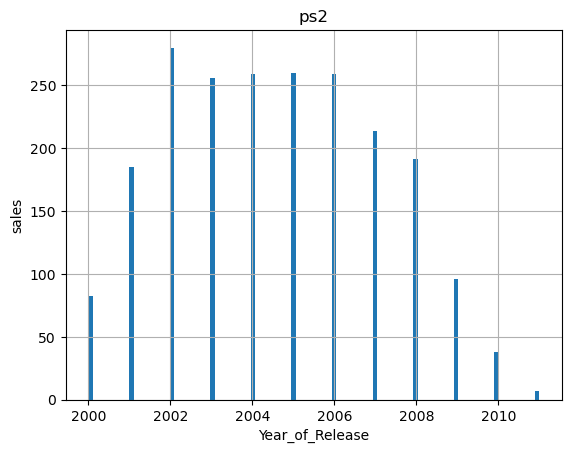

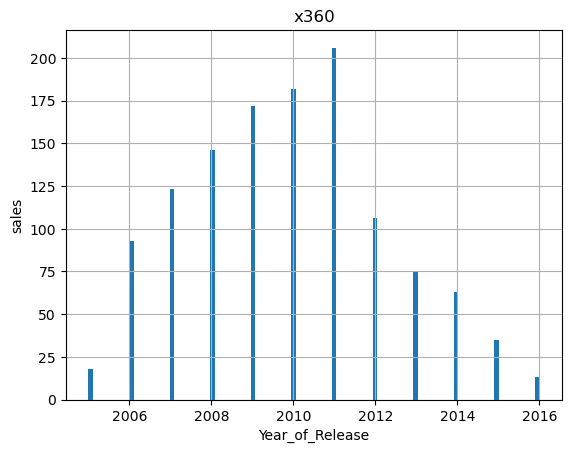

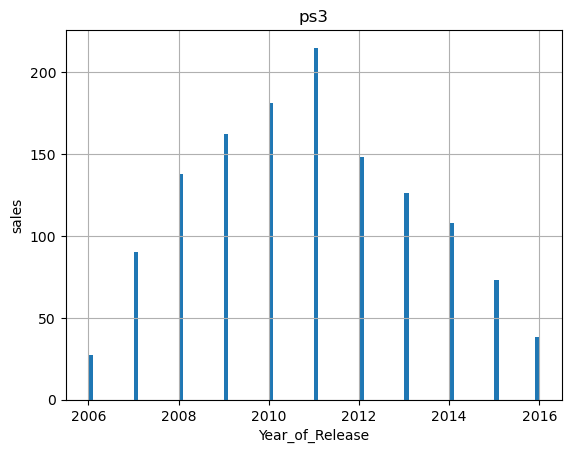

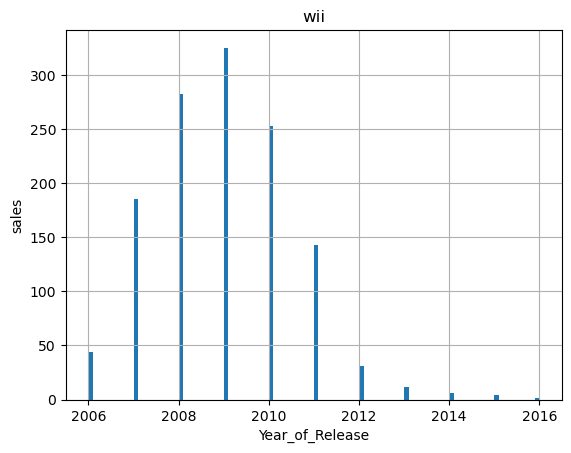

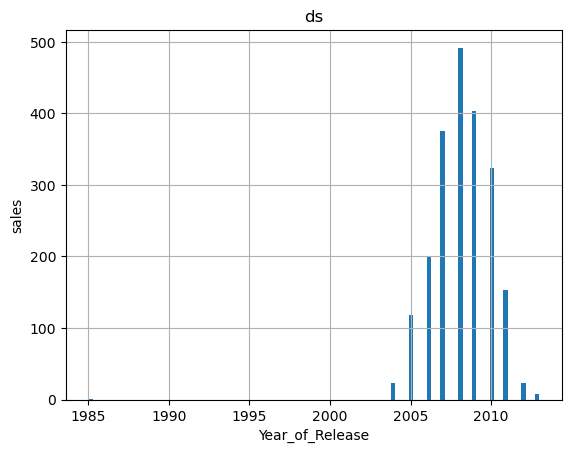

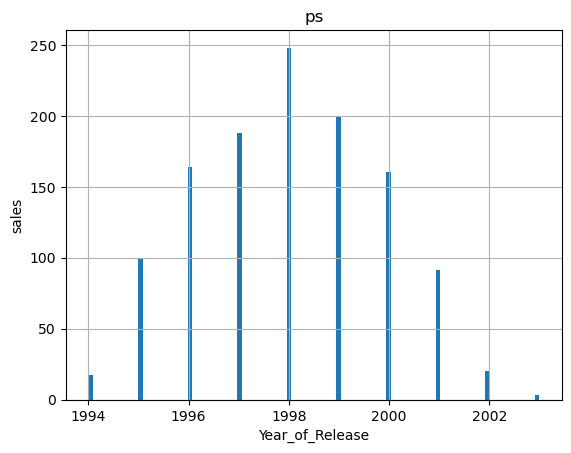

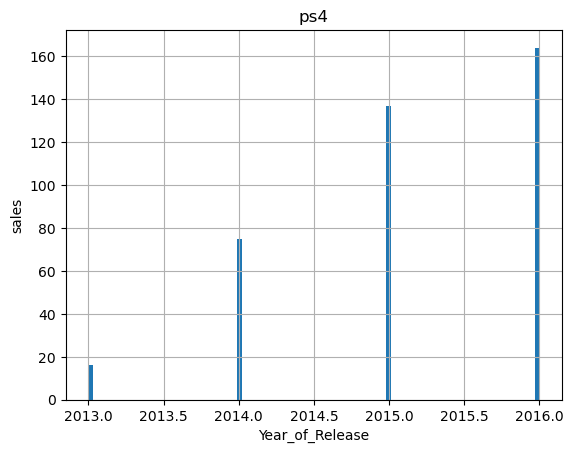

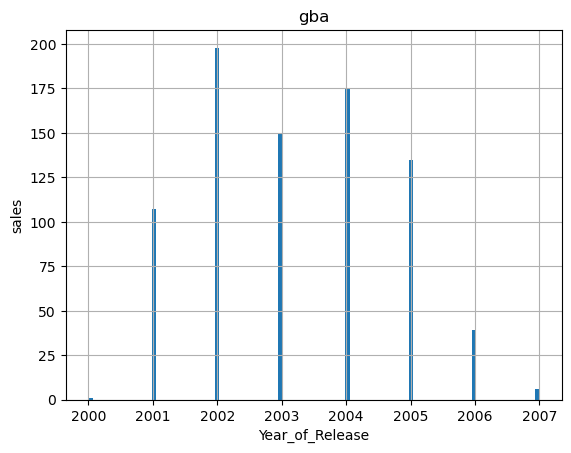

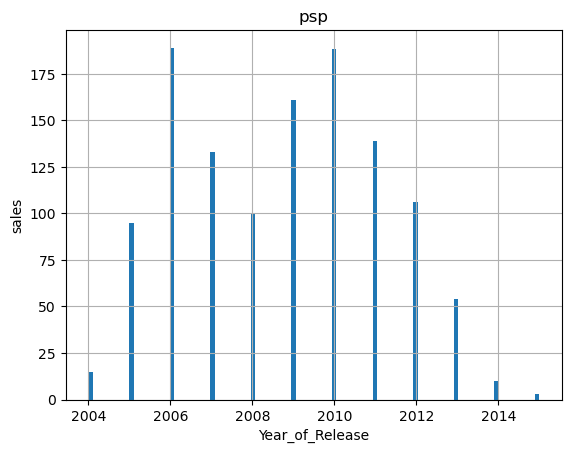

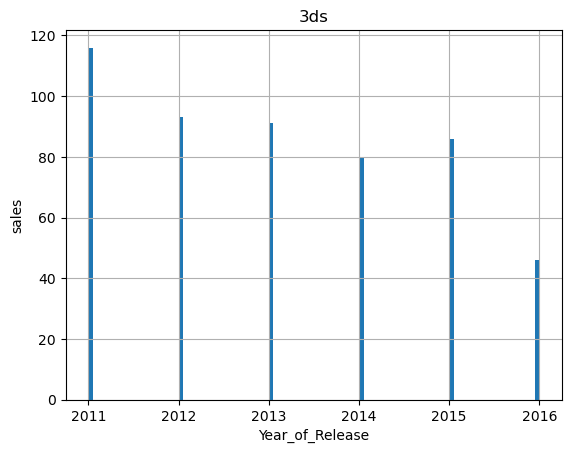

In [31]:
for pl in top_pl['Platform']:
    plt.figure()
    ax = data.loc[data['Platform'] == pl]['Year_of_Release'].hist(bins=100)
    ax.set(title=pl, xlabel='Year_of_Release', ylabel='sales')
plt.show()

Наиболее популярные платформы ps2, x360, ps3, wii, ds. На их примере видно, что "жизнь" одной платформы примерно 10 лет. 

In [32]:
data_actual = data[data['Year_of_Release'] > 2013]
data_actual.shape

(1689, 12)

За актуальный период возьмем 2014-2016 года. Так как сфера видеоигр развивается довольно таки быстро.

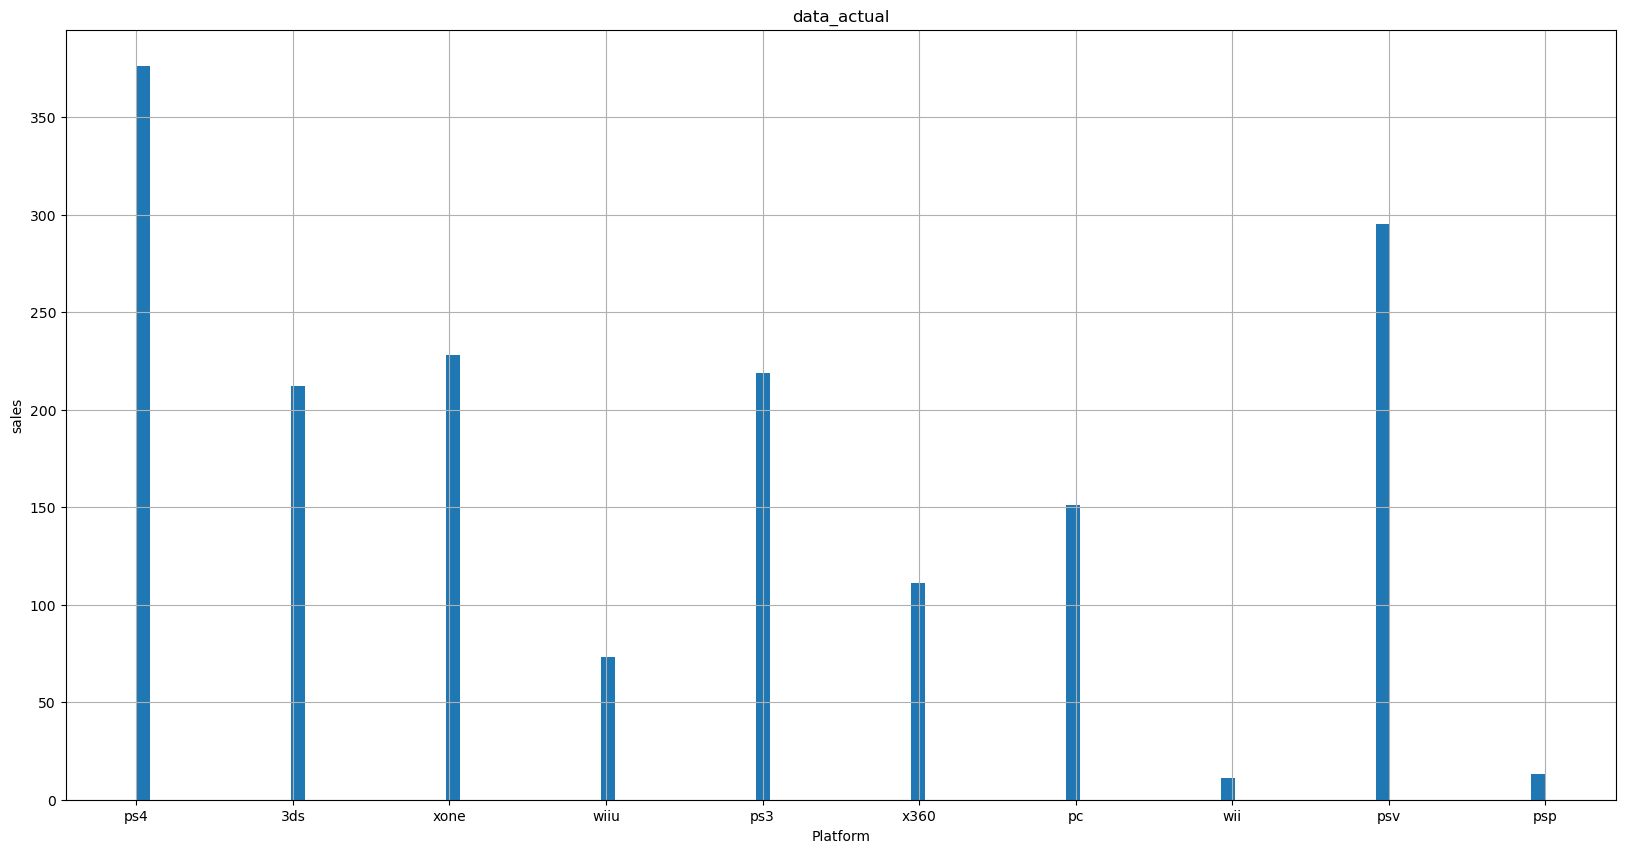

In [33]:
ax = data_actual['Platform'].hist(bins=100, figsize=(20, 10))
ax.set(title='data_actual', xlabel='Platform', ylabel='sales');

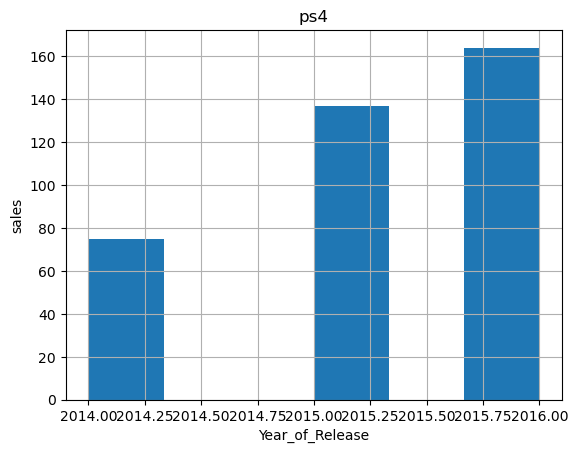

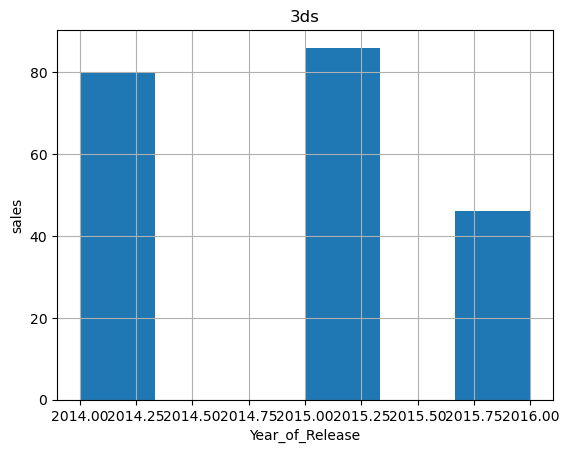

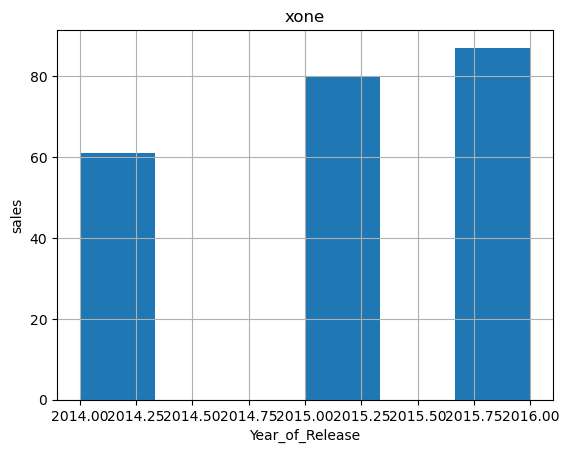

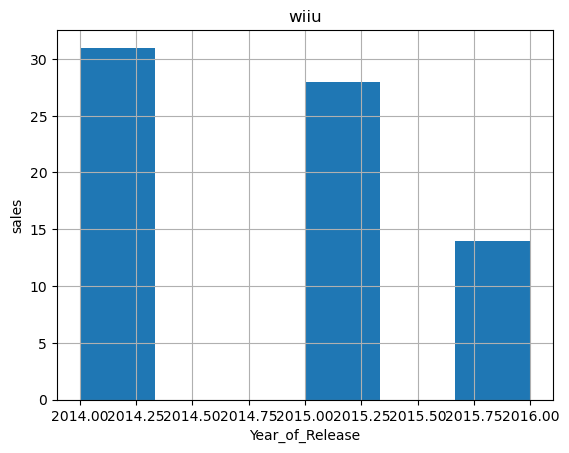

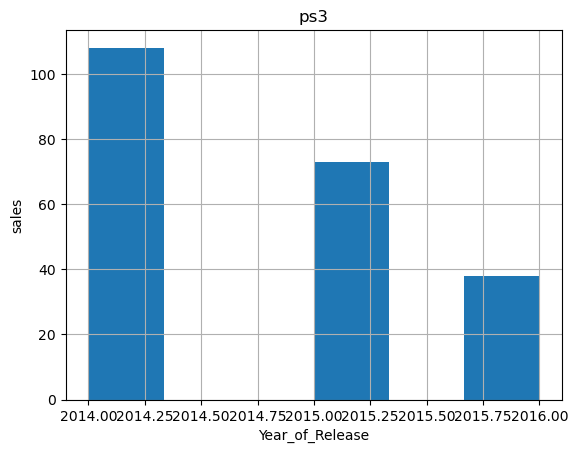

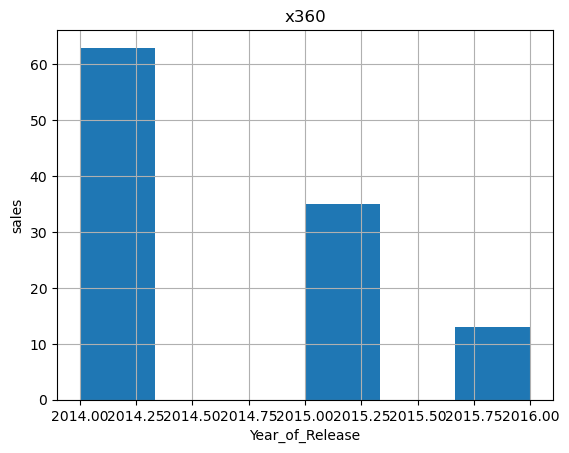

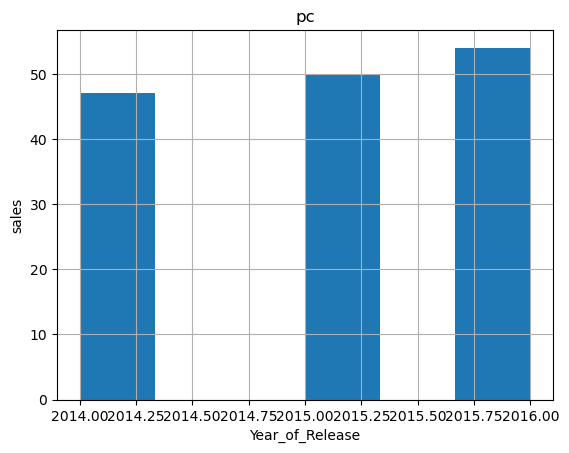

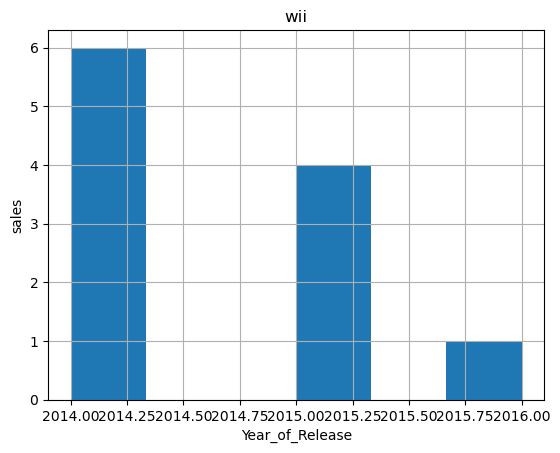

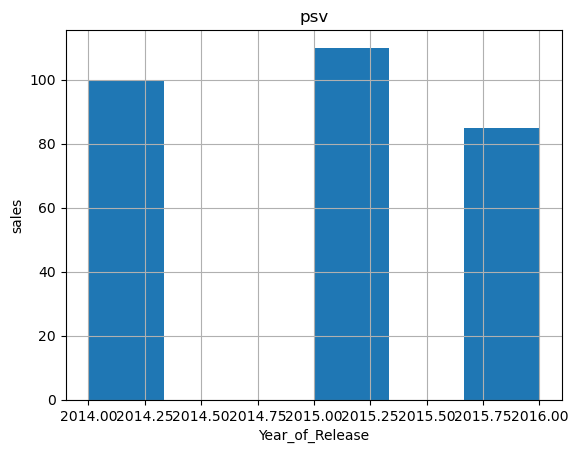

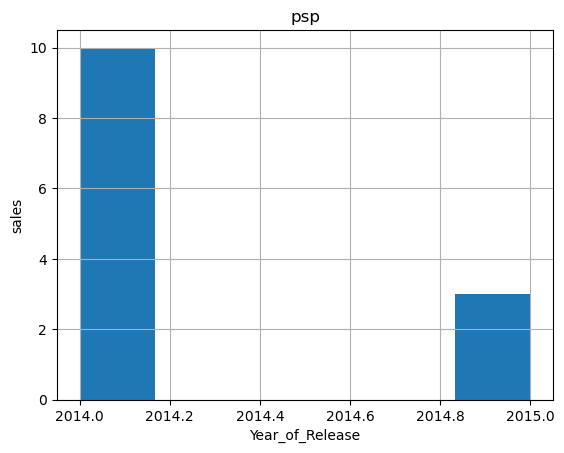

In [34]:
for pl in data_actual['Platform'].unique():
    plt.figure()
    ax = data_actual.loc[data_actual['Platform'] == pl]['Year_of_Release'].hist(bins=6)
    ax.set(title=pl, xlabel='Year_of_Release', ylabel='sales');
plt.show()

В выбранном периоде лидируют ps4 и psv. Продажи ps4, xone, pc, psv растут, значит являются самыми перспективными. Wiiu, ps3, x360, wii падают.

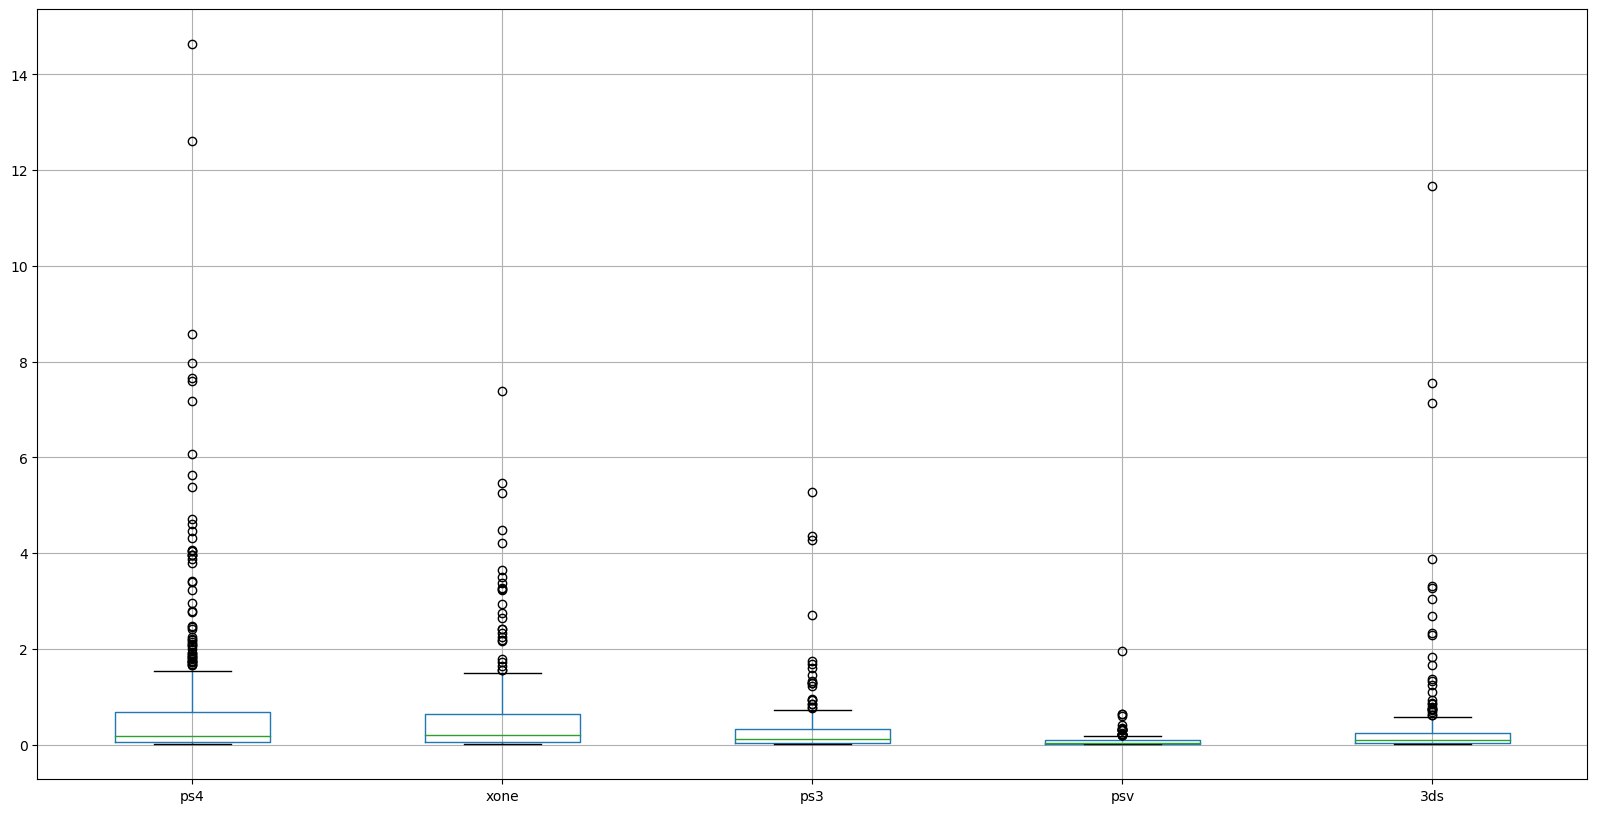

In [35]:
a = pd.DataFrame()
for pl in ['ps4', 'xone', 'ps3', 'psv', '3ds']:
    a[pl] = pd.DataFrame(data_actual.loc[data_actual['Platform'] == pl]['Sum_sales']).reset_index()['Sum_sales']
a.boxplot(column=['ps4', 'xone', 'ps3', 'psv', '3ds'], figsize=(20, 10));

На боксплоте видно, что самые высокие продажи у ps4 и xone. У них размах до 1.7, выше много выбросов.

0.32810508696636326

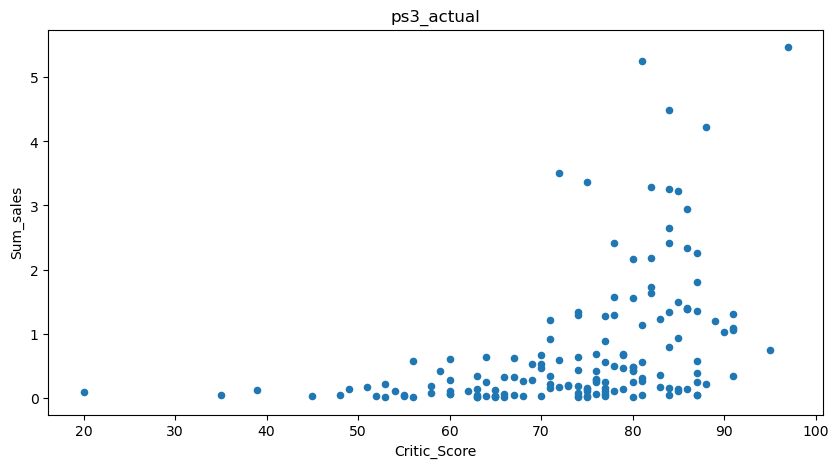

In [36]:
ax = data_actual.loc[data_actual['Platform'] == 'xone'].plot.scatter (x = 'Critic_Score', y = 'Sum_sales', figsize=(10, 5))
ax.set(title='ps3_actual');
data_actual['Critic_Score'].corr(data_actual['Sum_sales'])

-0.01307030500248456

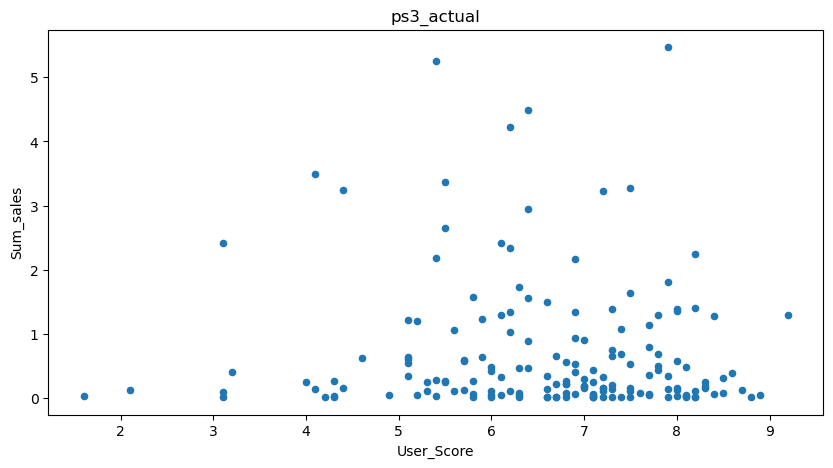

In [37]:
ax = data_actual.loc[data_actual['Platform'] == 'xone'].plot.scatter (x = 'User_Score', y = 'Sum_sales', figsize=(10, 5))
ax.set(title='ps3_actual');
data_actual['User_Score'].corr(data_actual['Sum_sales'])

0.32810508696636326

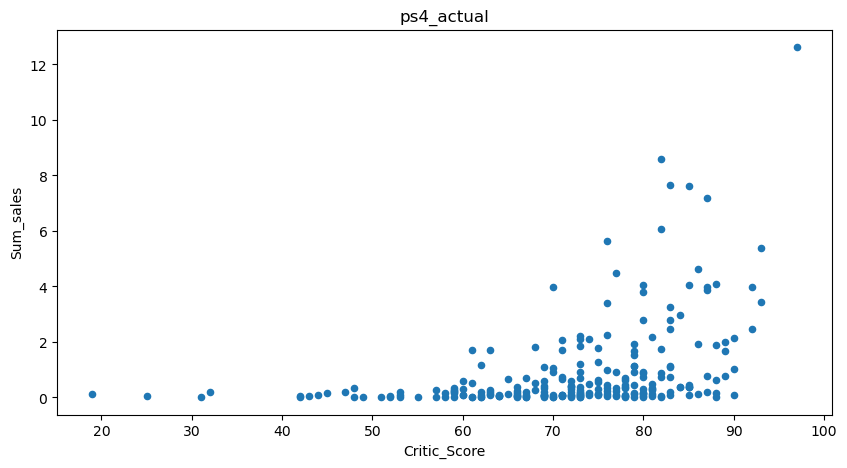

In [38]:
ax = data_actual.loc[data_actual['Platform'] == 'ps4'].plot.scatter (x = 'Critic_Score', y = 'Sum_sales', figsize=(10, 5))
ax.set(title='ps4_actual');
data_actual['Critic_Score'].corr(data_actual['Sum_sales'])

-0.01307030500248456

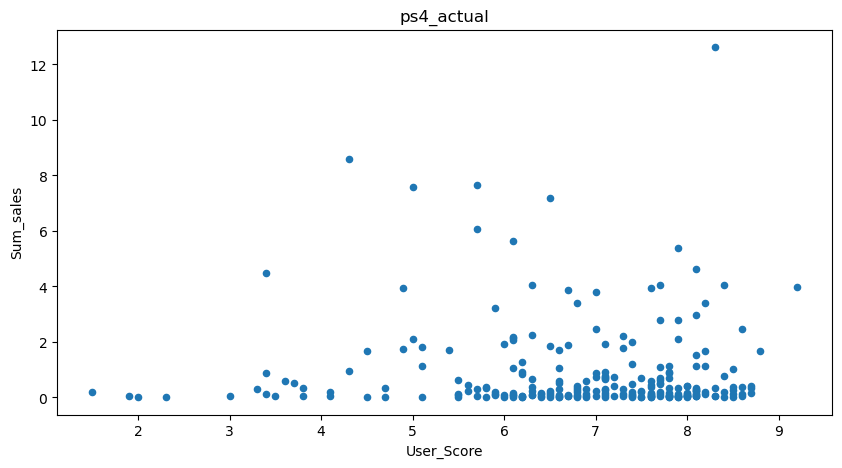

In [39]:
ax = data_actual.loc[data_actual['Platform'] == 'ps4'].plot.scatter (x = 'User_Score', y = 'Sum_sales', figsize=(10, 5))
ax.set(title='ps4_actual');
data_actual['User_Score'].corr(data_actual['Sum_sales'])

Корреляция между отзывами критиков и продажами (0.3) выше,чем между отзывами пользователей и продажами (небольшая отрицательная корелляция). Можно сделать вывод, что на других платформах продажи ниже из-за низкий оценок критиков.

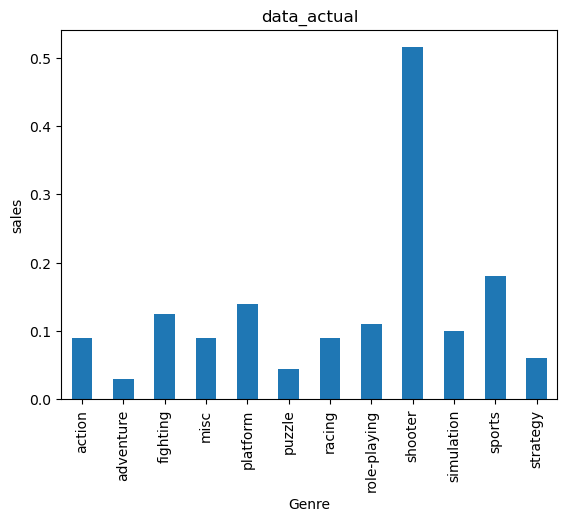

In [40]:
genre = data_actual.groupby(['Genre'])['Sum_sales'].median()
ax = genre.plot.bar(x = 'Genre', y = genre)
ax.set(title='data_actual', xlabel='Genre', ylabel='sales');

На гистограмме по жанрам видно, что лидирует shooter с большим отрывом. Самые низкие продажи у adventure и puzzle.

#### Шаг 4. Портрет пользователя каждого региона

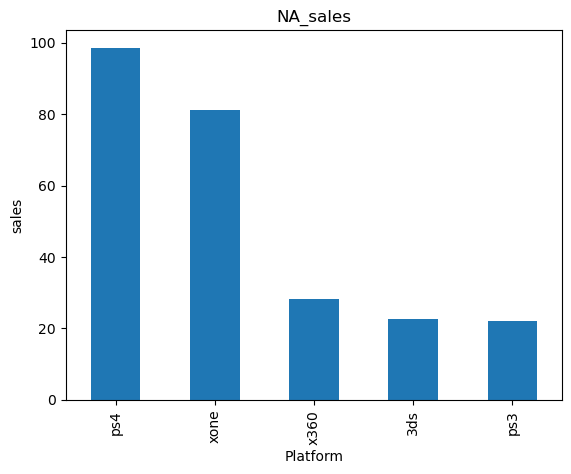

In [41]:
data_NA_sales = data_actual.groupby('Platform')['NA_sales'].sum().sort_values(ascending=False).head(5)
x = data_NA_sales[0]
y = data_NA_sales[1]
ax = data_NA_sales.plot.bar(x = 'x', y = 'y')
ax.set(title='NA_sales', xlabel='Platform', ylabel='sales');

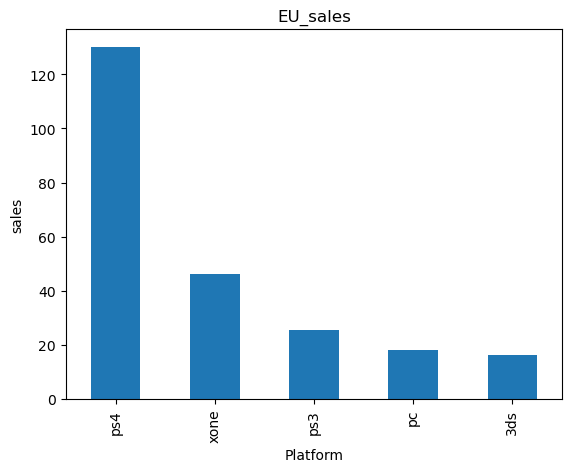

In [42]:
data_EU_sales = data_actual.groupby('Platform')['EU_sales'].sum().sort_values(ascending=False).head(5)
x = data_EU_sales[0]
y = data_EU_sales[1]
ax = data_EU_sales.plot.bar(x = 'x', y = 'y')
ax.set(title='EU_sales', xlabel='Platform', ylabel='sales');

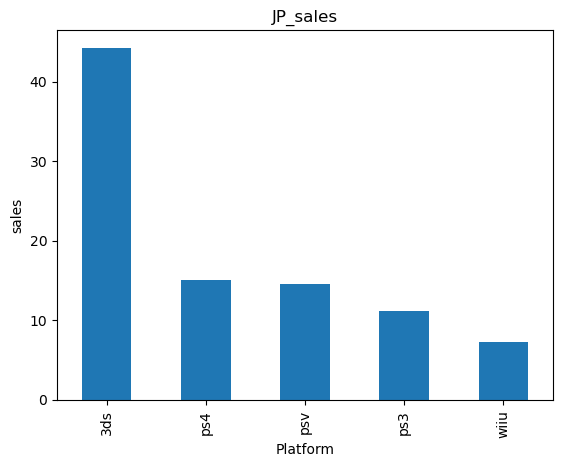

In [43]:
data_JP_sales = data_actual.groupby('Platform')['JP_sales'].sum().sort_values(ascending=False).head(5)
x = data_JP_sales[0]
y = data_JP_sales[1]
ax = data_JP_sales.plot.bar(x = 'x', y = 'y')
ax.set(title='JP_sales', xlabel='Platform', ylabel='sales');

В Северной Америке лидирует ps4 и x360, в Европе ps4 лидирует с большим отрывом. В Японии же лидирует 3ds.

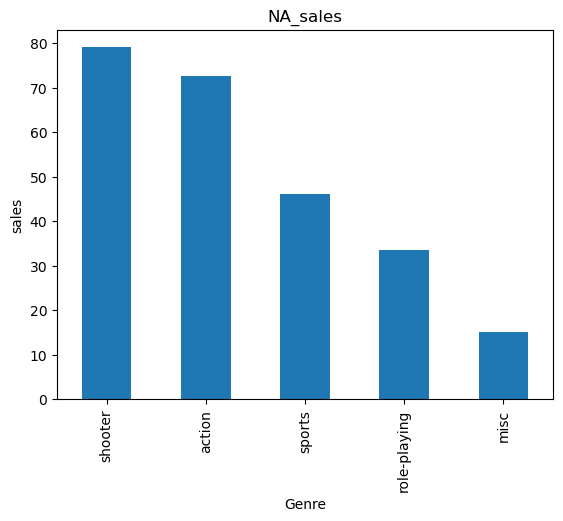

In [44]:
data_NA_sales = data_actual.groupby('Genre')['NA_sales'].sum().sort_values(ascending=False).head(5)
x = data_NA_sales[0]
y = data_NA_sales[1]
ax = data_NA_sales.plot.bar(x = 'x', y = 'y')
ax.set(title='NA_sales', xlabel='Genre', ylabel='sales');

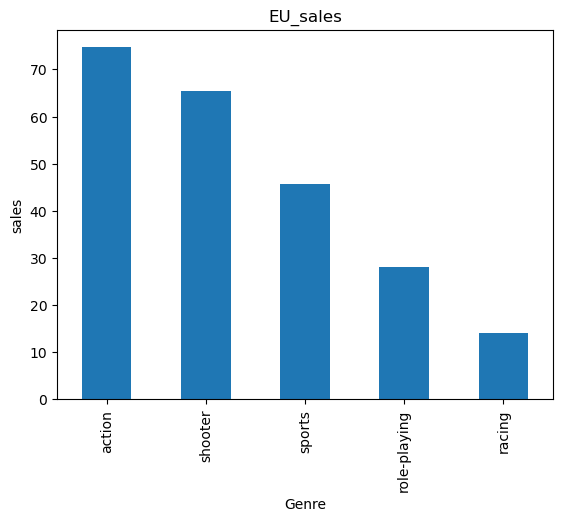

In [45]:
data_EU_sales = data_actual.groupby('Genre')['EU_sales'].sum().sort_values(ascending=False).head(5)
x = data_EU_sales[0]
y = data_EU_sales[1]
ax = data_EU_sales.plot.bar(x = 'x', y = 'y')
ax.set(title='EU_sales', xlabel='Genre', ylabel='sales');

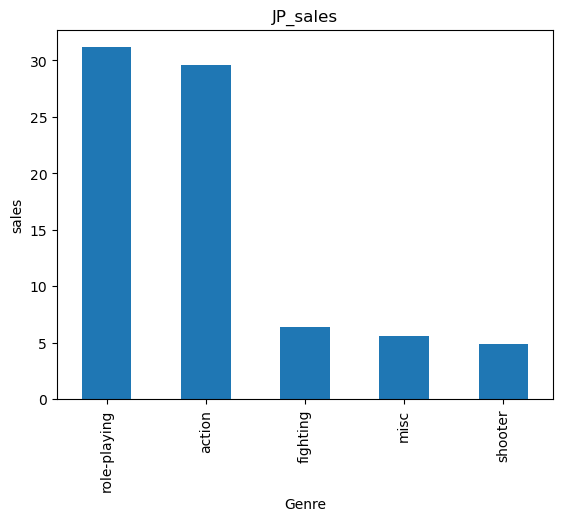

In [46]:
data_JP_sales = data_actual.groupby('Genre')['JP_sales'].sum().sort_values(ascending=False).head(5)
x = data_JP_sales[0]
y = data_JP_sales[1]
ax = data_JP_sales.plot.bar(x = 'x', y = 'y')
ax.set(title='JP_sales', xlabel='Genre', ylabel='sales');

Первые два места по жанрам в Северной Америке и Европе совпадают: shooter и action. В японии на первом месте role-playing, а на втором action.

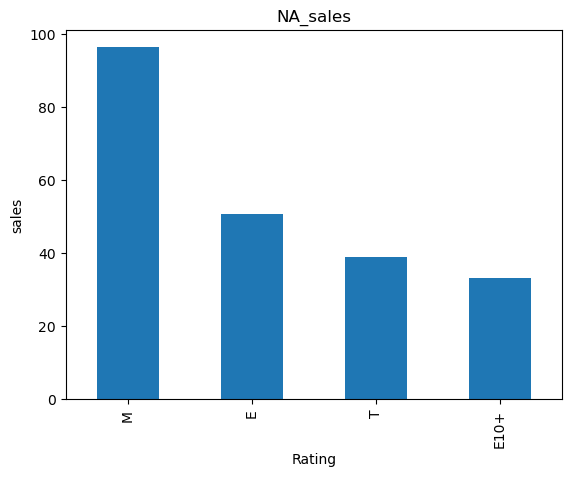

In [47]:
data_NA_sales = data_actual.groupby('Rating')['NA_sales'].sum().sort_values(ascending=False).head(5)
x = data_NA_sales[0]
y = data_NA_sales[1]
ax = data_NA_sales.plot.bar(x = 'x', y = 'y')
ax.set(title='NA_sales', xlabel='Rating', ylabel='sales');

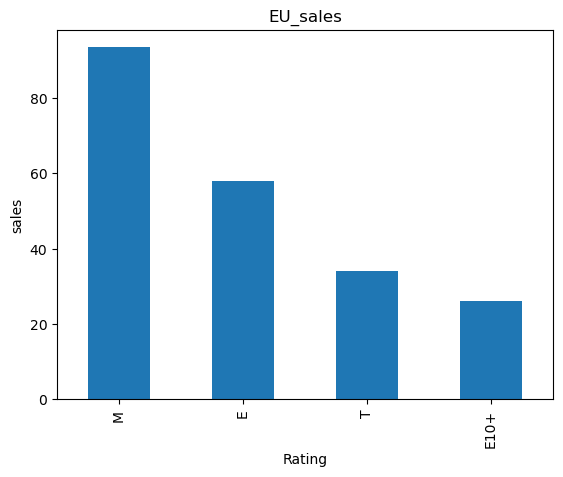

In [48]:
data_EU_sales = data_actual.groupby('Rating')['EU_sales'].sum().sort_values(ascending=False).head(5)
x = data_EU_sales[0]
y = data_EU_sales[1]
ax = data_EU_sales.plot.bar(x = 'x', y = 'y')
ax.set(title='EU_sales', xlabel='Rating', ylabel='sales');

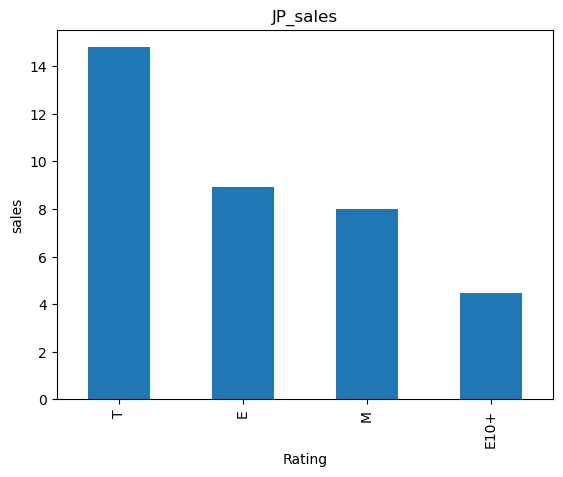

In [49]:
data_JP_sales = data_actual.groupby('Rating')['JP_sales'].sum().sort_values(ascending=False).head(5)
x = data_JP_sales[0]
y = data_JP_sales[1]
ax = data_JP_sales.plot.bar(x = 'x', y = 'y')
ax.set(title='JP_sales', xlabel='Rating', ylabel='sales');

В Северной Америке и Европе влияние рейтинга на продажи схоже. В Японии большие продажи игр с рейтингом Т.

В целом видно, что продажи в Северной Америке и Европе зависят от схожих факторов, а Япония довольно сильно отличается. Это связано с культурными особенностями стран.

#### Шаг 5. Проверка гипотез.

In [50]:
data_actual.loc[data_actual['Platform'] == 'xone']['User_Score']

99       NaN
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    NaN
16660    6.7
16672    NaN
Name: User_Score, Length: 228, dtype: float64

In [51]:
data_actual.loc[data_actual['Platform'] == 'pc', 'User_Score']

458      3.9
1530     5.4
1677     NaN
1730     7.9
2303     5.7
        ... 
16509    7.9
16518    1.4
16617    NaN
16631    NaN
16692    7.6
Name: User_Score, Length: 151, dtype: float64

In [52]:
alpha = 0.05
results = st.ttest_ind(data_actual.loc[data_actual['Platform'] == 'xone', 'User_Score'].dropna(), \
                       data_actual.loc[data_actual['Platform'] == 'pc', 'User_Score'].dropna())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Нулевая гиепотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная - они различаются. Применим двухсторонний ttest_ind, чтобы проверить это. По результатам теста отклонить нулевую гипотезу не получилось. Значит можно предположить, что рейтинги одинаковые.

In [53]:
alpha = 0.05
results = st.ttest_ind(data_actual.loc[data_actual['Genre'] == 'action']['User_Score'].dropna(), \
                       data_actual.loc[data_actual['Genre'] == 'sports']['User_Score'].dropna())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые.  Альтернативная - они различаются. Применим двухсторонний ttest_ind, чтобы проверить это. По результатам теста отвергаем нулевую гипотезу. Можно предположить, что рейтинги различны.

#### Шаг 5. Общий вывод.

    Предобработка данных:
    1) Полных дубликатов нет.
    2) В столбце год выпуска есть пропущенные значения. Скорее всего они не заполнились из-за технической ошибки. Так как в дальнейшем мы будем делить данные по годам, пропуски лучше удалить, их не так много.
    3) Приводим строковые переменные к нижнему регистру, чтобы было удобнее работать.
    4) Удаляем пропуски в имени и жанре, тк их мало.
    5) Остались пропущенные значения в трех столбцах, оставим их без изменений, тк их довольно таки большое количество и заполнение их какими-либо данные может повлиять на результат. Скорее всего пропуски получились из-за того, что данные оценки и возрастной рейтинг не были выставлены по какой-то причине.
    6) В столбце с оценками пользователей видим элемент tbd, что значит оценка уточняется. Таких элементов слишком много, чтобы их удалить. Поэтому заменим их на nan. После этого сменим тип данных на float.
    
    Исследовательский анализ данных:
    1) Большинство данных были получены с 2001 до 2016 года. Пик - 2009-2010 года.
    2) Наиболее популярные платформы ps2, ds, ps3, wii, x360. На их примере видно, что "жизнь" одной платформы примерно 10 лет.
    3) За актуальный период возьмем 2014-2016 года. Так как сфера видеоигр развивается довольно таки быстро.
    4) В выбранном периоде лидируют ps4 и psv. Продажи ps4, xone, pc, psv растут, значит являются самыми перспективными. Wiiu, ps3, x360, wii падают.
    5) На боксплоте видно, что самые высокие продажи у ps4 и xone. У них размах до 1.7, выше много выбросов.
    6) Корреляция между отзывами критиков и продажами (0.3) выше,чем между отзывами пользователей и продажами (низкая отрицательная корелляция). Можно сделать вывод, что на других платформах продажи ниже из-за низкий оценок критиков.
    7) На гистограмме по жанрам видно, что лидирует shooter с большим отрывом. Самые низкие продажи у adventure и puzzle.
    8) В Северной Америке лидирует ps4 и x360, в Европе ps4 лидирует с большим отрывом. В Японии же лидирует 3ds.
    9) Первые два места по жанрам в Северной Америке и Европе совпадают: shooter и action. В японии на первом месте role-playing, а на втором action.
    10) В Северной Америке и Европе влияние рейтинга на продажи схоже. В Японии большие продажи игр с рейтингом Т.
    11) В целом видно, что продажи в Северной Америке и Европе зависят от схожих факторов, а Япония довольно сильно отличается. Это связано с культурными особенностями стран.
    12) По результатам статистического теста можно предположить, что средние рейтинги платформ Xbox One и PC одинаковые. 
    13) По результатам статистического теста можно предположить, что средние пользовательские рейтинги жанров Action и Sports различны. 